<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/Double_Mass_Spring_Damper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulation of Double Mass-Spring-Damper System by Using Python Control System Library

In [3]:
! pip install slycot   # optional
! pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for slycot: filename=slycot-0.6.0-cp310-cp310-linux_x86_64.whl size=2020163 sha256=8c2a2a076b0a015c58e3c832b5b317cac37be70cc995a8b2a8aa6ff3036c21c0
  Stored in directory: /root/.cache/pip/wheels/92/04/62/2a104561c1b308a0768efe2e11d1e424c4419ee3ce1185dd5c
Successfully built slycot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 9.5 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import control as ct
import numpy as np

In [5]:
# this function is used for plotting of responses
# it generates a plot and saves the plot in a file
# xAxisVector - time vector
# yAxisVector - response vector
# titleString - title of the plot
# stringXaxis - x axis label
# stringYaxis - y axis label
# stringFileName - file name for saving the plot, usually png or pdf files

In [6]:
def plottingFunction(xAxisVector,
                     yAxisVector,
                     titleString,
                     stringXaxis,
                     stringYaxis,
                     stringFileName):

    plt.figure(figsize=(8,6))
    plt.plot(xAxisVector,yAxisVector, color='blue',linewidth=4)
    plt.title(titleString, fontsize=14)
    plt.xlabel(stringXaxis, fontsize=14)
    plt.ylabel(stringYaxis,fontsize=14)
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.grid(visible=True)
    plt.savefig(stringFileName,dpi=600)
    plt.show()

In [7]:
###############################################################################
#                   Open-loop state-space model
###############################################################################
# define the system parameters
m1=2  ; m2=3   ; k1=100  ; k2=200 ; d1=1  ; d2=5;

# define the continuous-time system matrices
A=np.array([[0, 1, 0, 0],
             [-(k1+k2)/m1 ,  -(d1+d2)/m1 , k2/m1 , d2/m1 ],
             [0 , 0 ,  0 , 1],
             [k2/m2,  d2/m2, -k2/m2, -d2/m2]])
B=np.array([[0],[0],[0],[1/m2]])
C=np.array([[1, 0, 0, 0]])
D=np.array([[0]])

In [8]:
#define an initial state for simulation
#x0=np.random.rand(2,1)
x0=np.zeros(shape=(4,1))
# define the state-space model
sysStateSpace=ct.ss(A,B,C,D)
# print the system
print(sysStateSpace)

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[   0.            1.            0.            0.        ]
     [-150.           -3.          100.            2.5       ]
     [   0.            0.            0.            1.        ]
     [  66.66666667    1.66666667  -66.66666667   -1.66666667]]

B = [[0.        ]
     [0.        ]
     [0.        ]
     [0.33333333]]

C = [[1. 0. 0. 0.]]

D = [[0.]]



In [9]:
###############################################################################
#            simulate the step response of the open-loop system
###############################################################################
# define the time vector for simulation
startTime=0
numberSamples=30001
h=0.001
endTime=numberSamples*h
timeVector=np.linspace(startTime,endTime,numberSamples)
# define the control input vector for simulation
controlInputVector=10*np.ones(numberSamples)
# simulate the system
# 1 input argument - state-space model
# 2 input argument - time vector
# 3 input argument - defined control input
# 4 input argument - initial state for simulation
returnSimulation = ct.forced_response(sysStateSpace,
                                      timeVector,
                                      controlInputVector,
                                      x0)

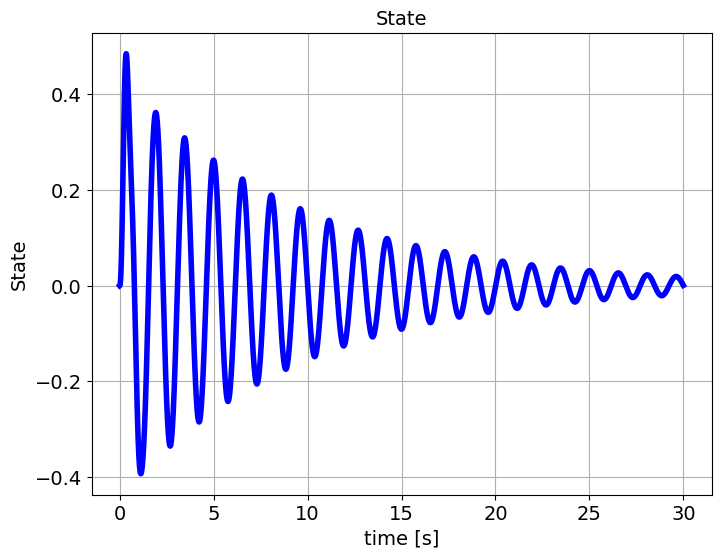

In [10]:
# outputs of the forced_response is the TimeResponseData
# object consisting of
# time values of returned objects
returnSimulation.time
# computed outputs of the system
returnSimulation.outputs
# state sequence of the system
returnSimulation.states
# inputs used for simulation
returnSimulation.inputs
# plot the simulation results
plottingFunction(returnSimulation.time,
                 returnSimulation.states[1,:],
                 titleString='State',
                 stringXaxis='time [s]' ,
                 stringYaxis='State',
                 stringFileName='stateResponseSS.png')
# save the simulation data
np.save('matrixStateToolbox.npy', returnSimulation.states)